# Homework 4 (Full mark: 100pt)
- Questions 1~3: Conceptual
- Questions 4~8: Programming

# Conceptual questions

# 1. Decision tree (15pt)

**It is mentioned in Section 8.2.3 that boosting using depth-one trees (or stumps) leads to an additive model: that is, a model of the form**

$f(X)=\sum_{j=1}^{p} f_{j}\left(X_{j}\right)$

**Explain why this is the case. You can begin with (8.12) in Algorithm 8.2 in the textbook**

$\hat{f}(x)=\sum_{b=1}^{B}λ\hat{f}^b(x)$   (8.12)

d = 1인 경우 각 트리는 single predictor(하나의 예측변수)를 기반으로 한다. 또한 각각의 모든 항은 additive model을 더함으로써 구할 수 있다.

# 2. Hyperplanes (8pt)

**We have seen that in $p = 2$ dimensions, a linear decision boundary takes the form $\beta_0+\beta_1X_1+\beta_2X_2 = 0$. We now investigate a non-linear decision boundary.**

**(a) Sketch the curve**: $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}=4$

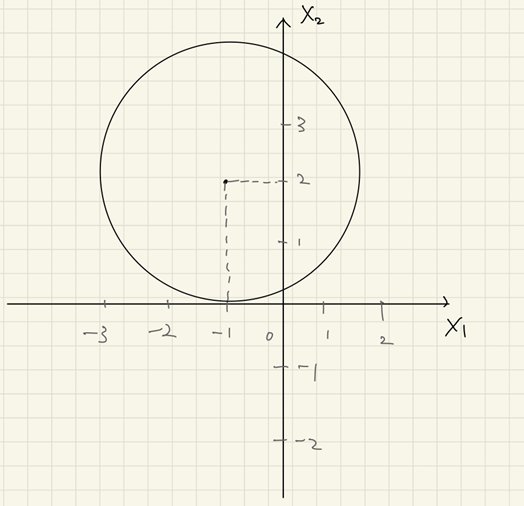

**(b) On your sketch, indicate the set of points for which** $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}>4$ **as well as the set of points for which** $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}\leq4$.

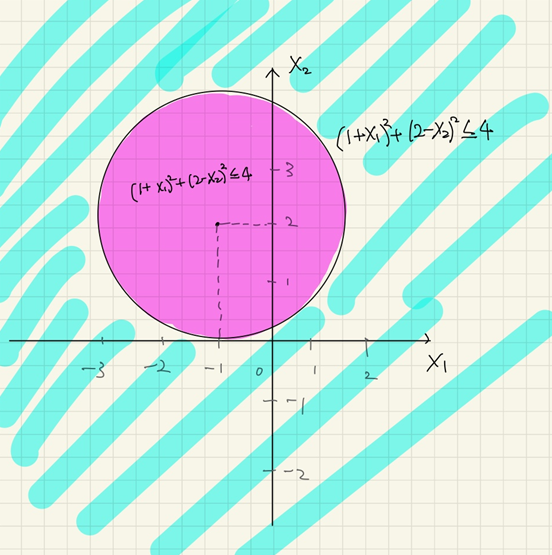

**(c) Suppose that a classifier assigns an observation to the blue class if** $\left(1+X_{1}\right)^{2}+\left(2-X_{2}\right)^{2}>4$**, and to the red class otherwise. To what class is the observation (0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?**

(-1,1)은 red class이고 나머지 (0,0),(2,2), (3,8)은 blue class이다.

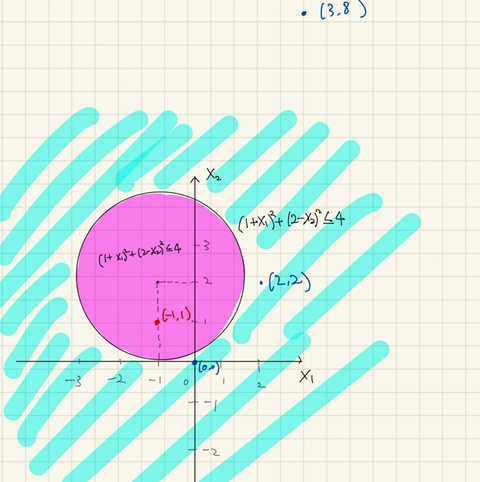

**(d) Argue that while the decision boundary in (c) is not linear in terms of $X_{1}$ and $X_{2}$, it is linear in terms of $X_{1}, X_{1}^{2}, X_{2}$, and $X_{2}^{2}$**

decision boundary 는 $f(x)=0$.이를 풀어쓰면

$f(x) = (1+X_1)^2+(2-X_2)^2 = X_1^2+X_2^2 + 2X_1-4X_2+1 = 0$

$Z_1 = X_1^2, Z_2 = X_2^2, Z_3 = X_1, Z_4 = X_4$라 하면 위 식은 Z에 대한 선형결합으로 나타내어진다.

$f(x) = Z_1+Z_2+2Z_3 -4Z_4+1 =0 $

따라서 decision boundary는 $X_1, X_1^2, X_2, X_2^2$에 대해 linear하다.

# 3. Hierarchical clustering (10pt)

**Suppose that for a particular data set, we perform hierarchical clustering using single linkage and using complete linkage. We obtain two dendrograms.**

**(a) At a certain point on the single linkage dendrogram, the clusters $\{1,2,3\}$ and $\{4,5\}$ fuse. On the complete linkage dendrogram, the clusters $\{1,2,3\}$ and $\{4,5\}$ also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?**

답하기에는 정보가 부족하다. x,y사이의 거리를 d(x,y)라고 하고 각 점 사이의 거리를 다음과 같다고 가정하자. d(1,4) = 1, d(1,5)=2, d(2,4)=2, d(2,5)=3, d(3,4)=3, d(3,5)=4. 이 때 single linkage인 경우 거리의 min은 1이기에 높이1에서 두 클러스터가 합쳐진다. complete linkage인 경우에는 높이 4에서 합쳐진다. 그러나 위에서 언급한 6개의 길이가 모두 2로 같을 경우에는 min이나 max가 2로 같으므로 single linkage, complete linkage가 같은 높이(2)에서 클러스터가 합쳐질 것이다. 경우에 따라 다른 융합이 발생하므로 확답을 위해서는 정보가 더 필요하다. 다만, single linkage는 거리의 min으로 융합하고 complete linkage의 경우 거리의 max로 융합하므로 single linkage가 같거나 더 낮은 높이에서 융합이 이루어질 것이라고 예상할 수 있다.

**(b) At a certain point on the single linkage dendrogram, the clusters $\{5\}$ and $\{6\}$ fuse. On the complete linkage dendrogram, the clusers $\{5\}$ and $\{6\}$ also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or s there not enough information to tell?**

점이 2개 뿐이므로 고려해야 하는 거리는 d(5,6)뿐이다. 거리가 하나이므로 min이나 max이나 같은 값을 같게 되고 따라서  single linkage나 complete linkage나 같은 높이에서 융합할 것이다.

# Programming questions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from six import StringIO
import pydotplus
from IPython.display import Image

%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

# 4. Bagging (10pt)

**In Lab 7, we implemented bagged decision tree using** ````RandomForestRegressor(max_features=len(X_train.columns))```` **since random forest that uses all the features is equivalent to bagging. For this question, implement bagging  by using  ````DecisionTreeRegressor````**.

In [ ]:
#boston_df = pd.read_csv('datda/Boston.csv').drop('Unnamed: 0', axis=1).dropna()
boston_df = pd.read_csv('/content/drive/MyDrive/ML IE/HW4/data/Boston.csv').drop('Unnamed: 0', axis=1).dropna()
X = boston_df.drop('medv', axis=1)
y = boston_df.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

## Write your answer here

In [ ]:
from sklearn.utils import resample
import random

In [ ]:
## Fitting

idx = [i for i in  X_train.index]
model_list = {}
num_bootstrap = 10

for i in range(num_bootstrap):
    bst_index = resample(idx, replace= True, n_samples = len(X_train), random_state=42)
    X_bst = X_train.loc[bst_index]
    y_bst = y_train.loc[bst_index]
    tree = DecisionTreeRegressor().fit(X_bst, y_bst)
    model_list[i] = tree

## Prediction

prediction_list = []

for i in range(num_bootstrap):
    pred = model_list[i].predict(X_test)    
    prediction_list.append(pred)
    
bst_result = np.array(prediction_list)
fin_result = np.mean(bst_result , axis= 0)


print(mean_squared_error(fin_result, y_test))

22.16363241106719


# 5. SVM 1 (10pt)

**Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.**

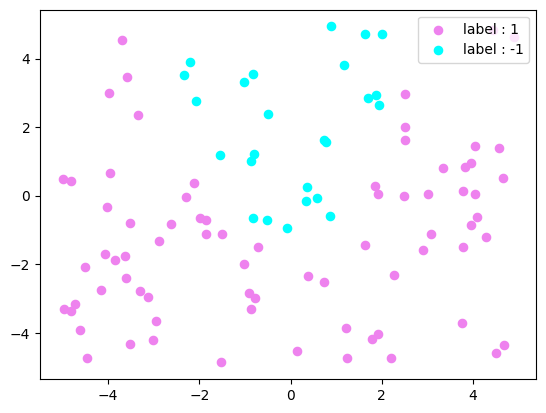

In [ ]:
## Write your answer here
from sklearn import svm
# generate data
np.random.seed(1)
X = np.random.uniform(low=-5.0, high=5.0, size=100)
np.random.seed(2)
Y = np.random.uniform(low=-5.0, high=5.0, size=100)
X, Y = X.reshape(100,1), Y.reshape(100,1)
X_train = np.concatenate((X,Y),axis=1)
T_train = np.ones(100)  #initialization setting: label=1


for idx in range(len(X_train)):
    if X[idx]**2 < Y[idx]+2:# (x^2 < y^2 +2 =>label=-1)
        T_train[idx] = -1
        
plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='violet', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='aqua', label='label : -1', s=35)
plt.legend(loc='upper right')

In [ ]:
def plot_svc(title, svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title, color='k')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

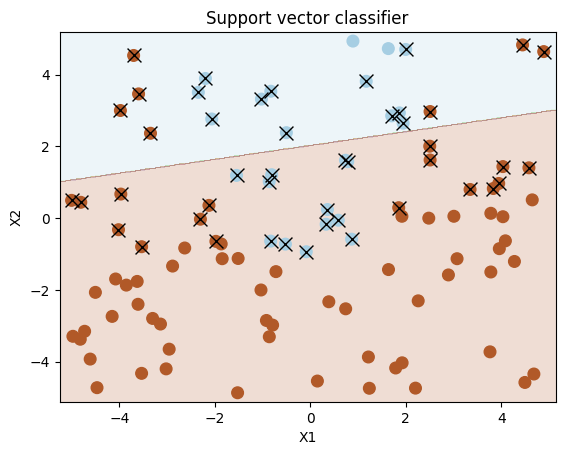

Number of support vectors:  46


In [ ]:
clf_linear = svm.SVC(kernel="linear", gamma="auto", C=1) 
clf_linear.fit(X_train, T_train)
plot_svc("Support vector classifier", clf_linear, X_train,T_train)

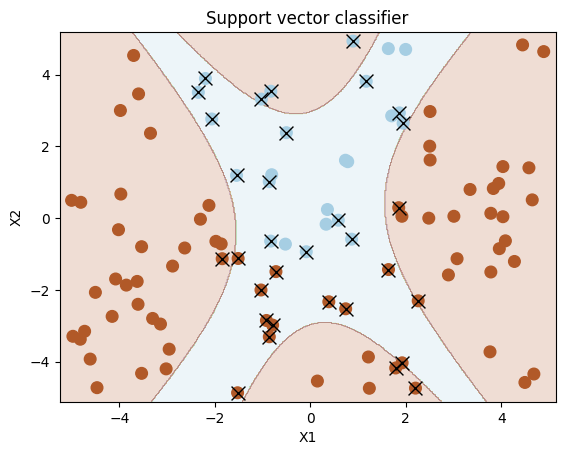

Number of support vectors:  32


In [ ]:
clf_poly = svm.SVC(kernel="poly", degree=4, gamma="auto", C=1)
clf_poly.fit(X_train, T_train)
plot_svc("Support vector classifier", clf_poly, X_train,T_train)

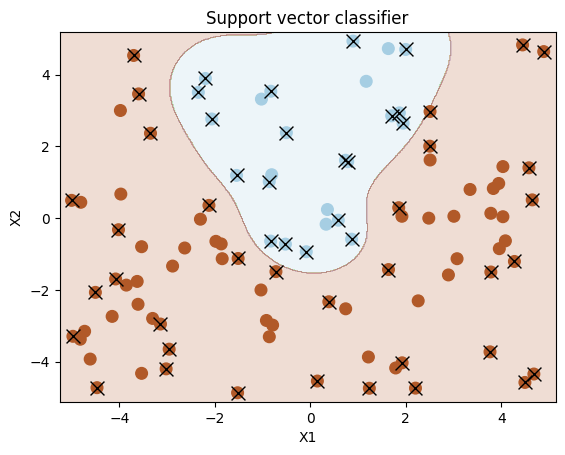

Number of support vectors:  53


In [ ]:
clf_rbf = svm.SVC(kernel="rbf", degree=4, gamma="auto", C=1) 
clf_rbf.fit(X_train, T_train)
plot_svc("Support vector classifier", clf_rbf, X_train,T_train)

In [ ]:
from sklearn.metrics import confusion_matrix
linear = pd.DataFrame(confusion_matrix(T_train, clf_linear.predict(X_train)),index=clf_linear.classes_, columns=clf_linear.classes_)
linear

,-1.0,1.0
-1.0,13,12
1.0,7,68


In [ ]:
poly = pd.DataFrame(confusion_matrix(T_train, clf_poly.predict(X_train)),index=clf_poly.classes_, columns=clf_poly.classes_)
poly

,-1.0,1.0
-1.0,22,3
1.0,11,64


In [ ]:
rbf = pd.DataFrame(confusion_matrix(T_train, clf_rbf.predict(X_train)),index=clf_rbf.classes_, columns=clf_rbf.classes_)
rbf

,-1.0,1.0
-1.0,25,0
1.0,0,75


linear, poly, rbf 3가지 경우를 비교해본 결과 rbf가 가장 뛰어난 성능을 보였다.

# 6. SVM 2 (16pt)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

%matplotlib inline

#df = pd.read_csv('data/OJ.csv', index_col=0)
df = pd.read_csv('/content/drive/MyDrive/ML IE/HW4/data/OJ.csv', index_col=0)
# Define predictors and response 
X = df.drop(axis=1, labels=['Purchase'])
y = df['Purchase']
# Dummy variables to transform qualitative into quantitative variables
X = pd.get_dummies(X)

**(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.**

In [ ]:
## Write your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=270/1070, random_state=2)

**(b) Fit a support vector classifier (```SVC```) to the training data using ````cost=0.01````, with ````Purchase```` as the response and the other variables as predictors (````cost```` refers to the regularization coefficient).**

In [ ]:
## Write your answer here
svc1 = SVC(C=0.01, kernel='linear', gamma=1)
svc1.fit(X_train, y_train)

SVC(C=0.01, gamma=1, kernel='linear')

In [ ]:
def plot_svc(title, svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title, color='k')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

**(c) What are the training and test error rates? Use confusion matrix for this problem.**

In [ ]:
#training error rates
train_confu = pd.DataFrame(confusion_matrix(y_train, svc1.predict(X_train)),index=svc1.classes_, columns=svc1.classes_)
train_confu 

,CH,MM
CH,433,52
MM,133,182


In [ ]:
## Write your answer here
y_pred = svc1.predict(X_test)
test_confu = pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc1.classes_, columns=svc1.classes_)
test_confu

,CH,MM
CH,157,11
MM,48,54


In [ ]:
train_err_rate = 1-(train_confu['CH'][0] + train_confu['MM'][1])/(train_confu.sum().sum())
test_err_rate = 1-(test_confu['CH'][0] + test_confu['MM'][1])/(test_confu.sum().sum())

print('train_err_rate:',train_err_rate)
print('test_err_rate:',test_err_rate )

train_err_rate: 0.23124999999999996
test_err_rate: 0.21851851851851856


**(d) Use the ````GridSearchCV```` function to select an optimal ````cost````. Consider values in the range $0.01$ to $10$. Do as much as you PC allows.**

In [ ]:
## Write your answer here
tuned_parameters = [{'C': [0.01, 0.1, 1, 10]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.0183919 , 0.02470636, 0.05243249, 0.19067507]),
 'std_fit_time': array([0.00447796, 0.00487784, 0.00788176, 0.03296875]),
 'mean_score_time': array([0.0048511 , 0.00491323, 0.00418549, 0.00537181]),
 'std_score_time': array([0.00010881, 0.00105222, 0.00014383, 0.0011207 ]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'split0_test_score': array([0.74375, 0.83125, 0.84375, 0.8375 ]),
 'split1_test_score': array([0.6375 , 0.80625, 0.80625, 0.79375]),
 'split2_test_score': array([0.68125, 0.80625, 0.825  , 0.81875]),
 'split3_test_score': array([0.65  , 0.775 , 0.7875, 0.7875]),
 'split4_test_score': array([0.68125, 0.8125 , 0.81875, 0.8125 ]),
 'mean_test_score': array([0.67875, 0.80625, 0.81625, 0.81   ]),
 'std_test_score': array([0.03678485, 0.01811422, 0.01879162, 0.01794088]),
 'rank_test_scor

**(e) Compute the training and test error rates using this new value for ````cost````.**

In [ ]:
## Write your answer here
clf.best_params_

{'C': 1}

In [ ]:
best_train_confu= pd.DataFrame(confusion_matrix(y_train, clf.best_estimator_.predict(X_train)), index=clf.classes_, columns=clf.classes_)
best_test_confu = pd.DataFrame(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)), index=clf.classes_, columns=clf.classes_)

In [ ]:
train_err_rate = 1-(best_train_confu['CH'][0] + best_train_confu['MM'][1])/(best_train_confu.sum().sum())
test_err_rate = 1-(best_test_confu['CH'][0] + best_test_confu['MM'][1])/(best_test_confu.sum().sum())

print('train_err_rate:',train_err_rate)
print('test_err_rate:',test_err_rate )

train_err_rate: 0.17625000000000002
test_err_rate: 0.13703703703703707


**(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for ````gamma````.**

In [ ]:
## Write your answer here
svc2 = SVC(C=0.01, kernel='rbf')
svc2.fit(X_train, y_train)

SVC(C=0.01)

In [ ]:
train_confu2 = pd.DataFrame(confusion_matrix(y_train, svc2.predict(X_train)),index=svc2.classes_, columns=svc2.classes_)
train_confu2 

,CH,MM
CH,485,0
MM,315,0


In [ ]:
y_pred = svc2.predict(X_test)
test_confu2 = pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc2.classes_, columns=svc2.classes_)
test_confu2

,CH,MM
CH,168,0
MM,102,0


In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10]}]
clf2 = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=5, scoring='accuracy')
clf2.fit(X_train, y_train)
clf2.cv_results_

{'mean_fit_time': array([0.02066135, 0.02022519, 0.02022586, 0.02410498]),
 'std_fit_time': array([0.00172597, 0.00135568, 0.00063138, 0.00418776]),
 'mean_score_time': array([0.00841112, 0.00841274, 0.00836296, 0.00887766]),
 'std_score_time': array([0.00032579, 0.00055484, 0.00032729, 0.00096125]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'split0_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split1_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split2_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split3_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split4_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'mean_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'std_test_score': array([0., 0., 0., 0.]),
 'rank_test_score': array([1, 1, 1, 1], dtyp

In [ ]:
## Write your answer here
clf2.best_params_

{'C': 0.01}

In [ ]:
best_train_confu2= pd.DataFrame(confusion_matrix(y_train, clf2.best_estimator_.predict(X_train)), index=clf2.classes_, columns=clf2.classes_)
best_test_confu2 = pd.DataFrame(confusion_matrix(y_test, clf2.best_estimator_.predict(X_test)), index=clf2.classes_, columns=clf2.classes_)
train_err_rate2 = 1-(best_train_confu2['CH'][0] + best_train_confu2['MM'][1])/(best_train_confu2.sum().sum())
test_err_rate2 = 1-(best_test_confu2['CH'][0] + best_test_confu2['MM'][1])/(best_test_confu2.sum().sum())

print('train_err_rate:',train_err_rate2)
print('test_err_rate:',test_err_rate2 )

train_err_rate: 0.39375000000000004
test_err_rate: 0.37777777777777777


**(g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set ````degree=2````.**

In [ ]:
## Write your answer here
svc3 = SVC(C=0.01, kernel='poly', degree = 2, gamma=1)
svc3.fit(X_train, y_train)

SVC(C=0.01, degree=2, gamma=1, kernel='poly')

In [ ]:
train_confu3 = pd.DataFrame(confusion_matrix(y_train, svc3.predict(X_train)),index=svc3.classes_, columns=svc3.classes_)
train_confu3 

,CH,MM
CH,415,70
MM,74,241


In [ ]:
y_pred = svc3.predict(X_test)
test_confu3 = pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc3.classes_, columns=svc3.classes_)
test_confu3

,CH,MM
CH,150,18
MM,17,85


In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10]}]
clf3 = GridSearchCV(SVC(kernel='poly', degree=2), tuned_parameters, cv=5, scoring='accuracy')
clf3.fit(X_train, y_train)
clf3.cv_results_

{'mean_fit_time': array([0.02764192, 0.02715774, 0.02991457, 0.03135281]),
 'std_fit_time': array([0.00101494, 0.00186756, 0.00245957, 0.00158859]),
 'mean_score_time': array([0.00931263, 0.00893669, 0.01073809, 0.00914125]),
 'std_score_time': array([0.00017035, 0.00080115, 0.00446096, 0.00135281]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}],
 'split0_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split1_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split2_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split3_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'split4_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'mean_test_score': array([0.60625, 0.60625, 0.60625, 0.60625]),
 'std_test_score': array([0., 0., 0., 0.]),
 'rank_test_score': array([1, 1, 1, 1], dtyp

In [ ]:
clf3.best_params_

{'C': 0.01}

In [ ]:
best_train_confu3= pd.DataFrame(confusion_matrix(y_train, clf3.best_estimator_.predict(X_train)), index=clf3.classes_, columns=clf3.classes_)
best_test_confu3 = pd.DataFrame(confusion_matrix(y_test, clf3.best_estimator_.predict(X_test)), index=clf3.classes_, columns=clf3.classes_)
train_err_rate3 = 1-(best_train_confu3['CH'][0] + best_train_confu3['MM'][1])/(best_train_confu3.sum().sum())
test_err_rate3 = 1-(best_test_confu3['CH'][0] + best_test_confu3['MM'][1])/(best_test_confu3.sum().sum())

print('train_err_rate:',train_err_rate3)
print('test_err_rate:',test_err_rate3 )

train_err_rate: 0.39375000000000004
test_err_rate: 0.37777777777777777


**(h) Overall, which approach seems to give the best results on this data?**

linear인 경우에 가장 좋은 성능을 보였다.

In [ ]:
## Write your answer here


# 7. Clustering (16pt)

**In Lab 9, we implemented K-means clustering using ````KMeans()```` . For this question, you will implement K-means clustering from scratch following the class format of sklearn. Reproduce Section 2.1 in Lab 9. Note that you may not be able to get the exact same results.**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data
np.random.seed(2)
X = np.random.standard_normal((25,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

# KMeans class
class KMeans:
    def __init__(self, n_clusters=8, n_init=10, max_iter=300, tol=0.0001):
        self.n_clusters = n_clusters
        self.n_init = n_init        
        self.max_iter = max_iter
        self.tol = tol
        

    def fit(self, data):
        ## Write your answer here
        #np.random.seed(2)  # the choice of these random samples is governed by the "self.random_state".
        initial_cluster_centers_idx = np.random.choice(len(data), self.n_clusters, replace=False) # choose the 'n_clusters' number of samples in X to take them as initial centriods
        self.cluster_centers_ = data[initial_cluster_centers_idx]  # initial centroids
        
        
        n =  len(data)
        dim = data.shape[1]
        while(1):
            distance_arr = np.linalg.norm(data-self.cluster_centers_[0], 2, axis =1)    # 각 클러스터까지의 거리
            for i in range(self.n_clusters-1):
                distance_arr1 = np.linalg.norm(data-self.cluster_centers_[i+1], 2, axis =1)
                distance_arr = np.column_stack((distance_arr,distance_arr1))
            new_labels = distance_arr.argmin(axis=1)
            # var를 최소로 하는 새로운 center를 찾는다
            new_center = np.zeros([self.n_clusters,dim]) #initialize
            num_of_dot = np.zeros(self.n_clusters)

            for k,item in enumerate(new_labels):
                new_center[item]+=data[k]
                num_of_dot[item]+=1
            for j in range(self.n_clusters):
                new_center[j] = new_center[j]/num_of_dot[j]
            # 기존 center랑 비교한다
            if (new_center == self.cluster_centers_).all():
                break
            else:
                self.cluster_centers_ = new_center



        self.labels_ = new_labels # return the best labels
        self.cluster_centers_ = new_center # return the best cluster_centers_

In [ ]:
# Example of running KMeans
np.random.seed(2)
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

In [ ]:
km1.labels_

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1])

In [ ]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

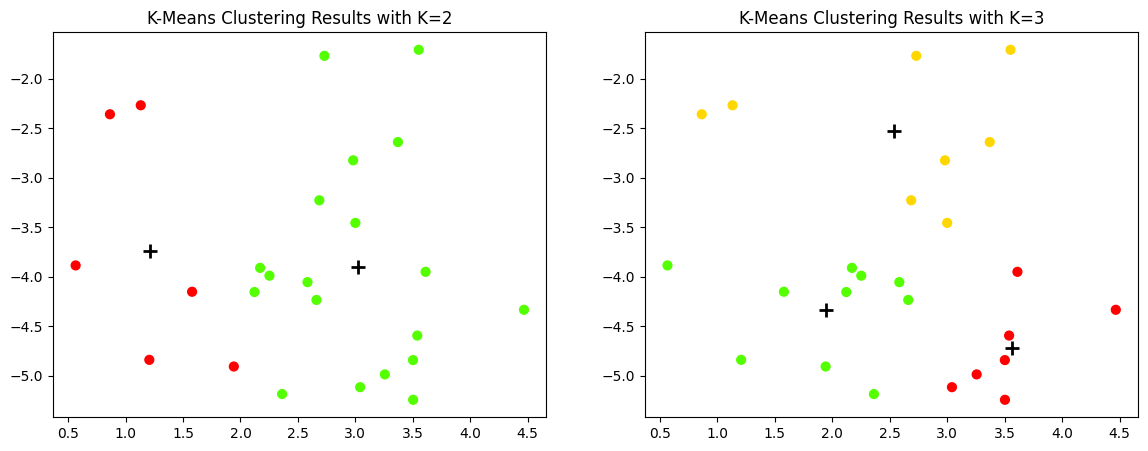

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism)
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

# 8. PCA: Proportion of Variance Explained (PVE) (15pt)

**In Lab 9, we learned how to calculate PVE by using ``sklearn``. In this exercise, calculate PVE from scratch by implementing the following equation:**

$\frac{\sum_{i=1}^{n}\left(\sum_{j=1}^{p} \phi_{j m} x_{i j}\right)^{2}}{\sum_{j=1}^{p} \sum_{i=1}^{n} x_{i j}^{2}}$ (Equation 10.8 in the textbook)

**and compare the results with the PVE that is computed by ``sklearn``.**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Import dataset
#df = pd.read_csv('data/USArrests.csv', index_col=0)
df = pd.read_csv('/content/drive/MyDrive/ML IE/HW4/data/USArrests.csv', index_col=0)

X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [ ]:
## Write your answer here
pc = pca.components_
pc[3]

array([ 0.6492278 , -0.74340748,  0.13387773,  0.08902432])

In [ ]:
denominator = (X**2).sum().sum() #분모
print('first pc',((X*pc[0]).sum(axis=1)**2).sum() /denominator)
print('second pc',((X*pc[1]).sum(axis=1)**2).sum()/denominator)
print('third pc',((X*pc[2]).sum(axis=1)**2).sum()/denominator)
print('fourth pc',((X*pc[3]).sum(axis=1)**2).sum()/denominator)

first pc 0.6200603947873734
second pc 0.24744128813496047
third pc 0.08914079514520755
fourth pc 0.04335752193245885
